# Data Exploration Walkthrough

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(df_train.shape)

(1460, 81)


In [5]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
# check dor dupes for ID
idsUnique = len(set(df_train.Id))
idsTotal = df_train.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)
#drop id col
df_train.drop(['Id'], axis=1, inplace=True)

0


### Exploring the Target Variable

/Users/reneehall/opt/anaconda3/envs/lighthouse/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

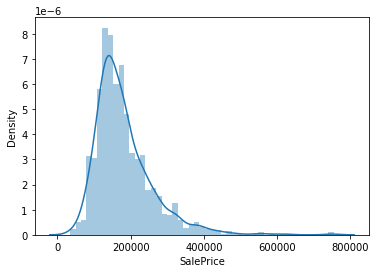

In [7]:
# descriptive statistics
df_train['SalePrice'].describe()
# histogram
sns.distplot(df_train['SalePrice'])

### Relationship between the target variable and predictors

In [8]:
sorted(list(df_train.columns))

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'Sa

In [9]:
# List of useful variables: OverallQual, YearBuilt, Neighborhood, TotalBsmtSF, GrLivArea

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

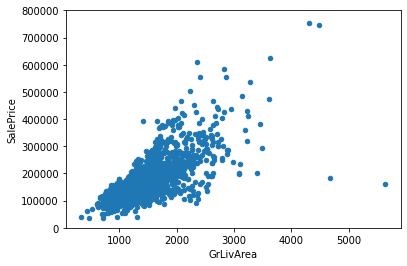

In [10]:
#scatter plot grlivarea vs SalePrice
var = 'GrLivArea'
data = df_train[['SalePrice', var]]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

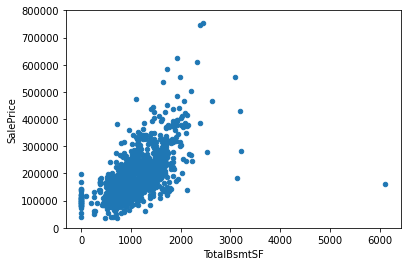

In [11]:
# scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = df_train[['SalePrice', var]]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

### Categorical Variables

(-0.5, 9.5, 0.0, 800000.0)

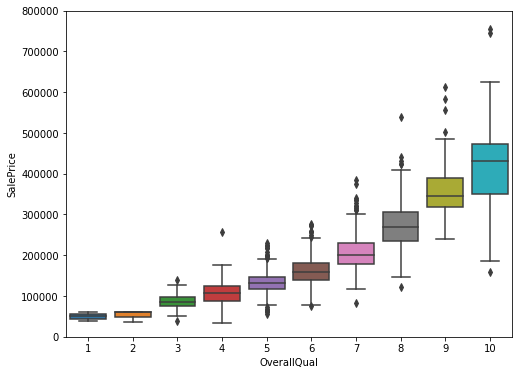

In [12]:
# overallqual
var = 'OverallQual'
data = df_train[['SalePrice', var]]
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

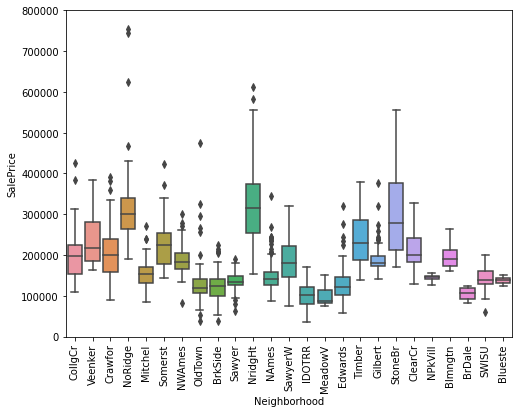

In [13]:
# Neighborhood 
var = 'Neighborhood'
data = df_train[['SalePrice', var]]
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

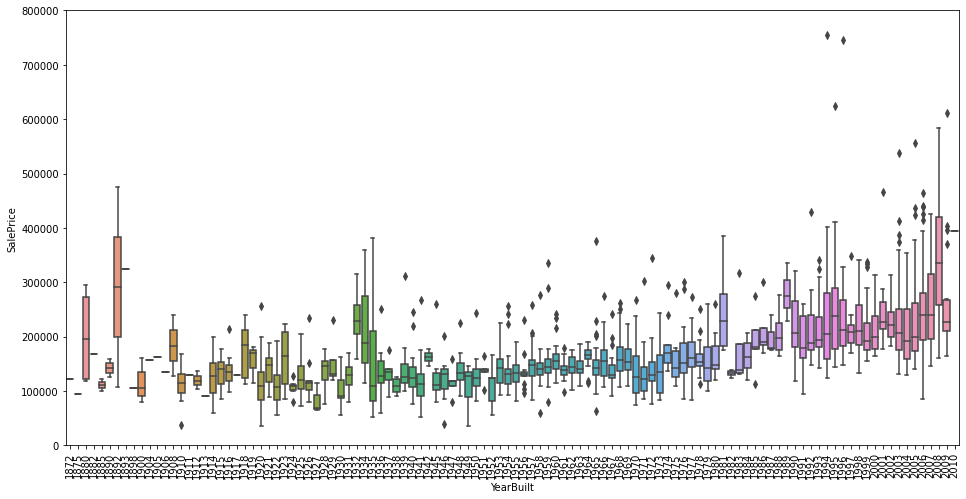

In [14]:
# YearBuild
var = 'YearBuilt'
data = df_train[['SalePrice', var]]
f, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

### Multivariate Analysis

<AxesSubplot:>

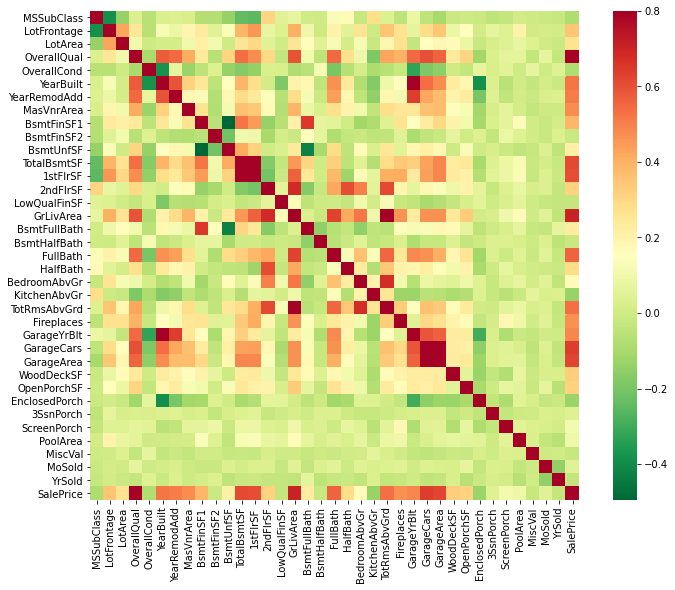

In [15]:
# correlation matrix
corrmat = df_train.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='RdYlGn_r')

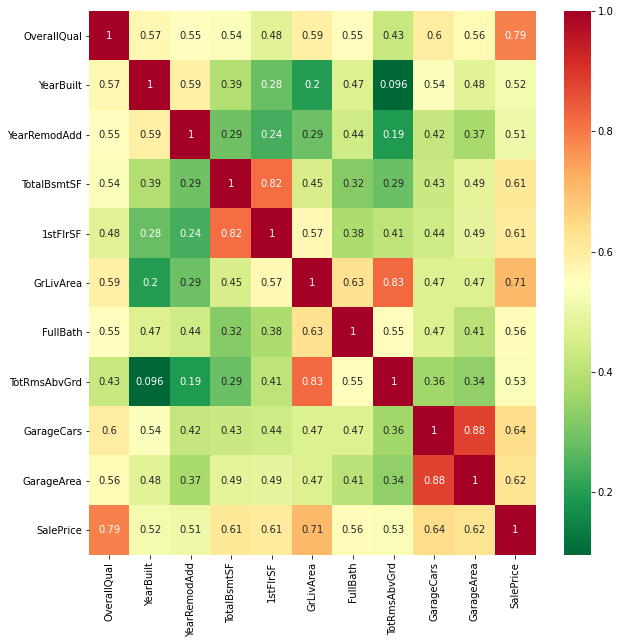

In [16]:
# most correlated features with SalePrice
corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True, cmap="RdYlGn_r")

In [17]:
# Notes from above
'''
These are the variables most correlated with SalePrice. Our thoughts on this:

'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
'GarageCars' and 'GarageArea' are also among the most strongly correlated variables. The number of cars that fit into a garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to be able to say that our first guess was right :).
'FullBath'?? Really?
'TotRmsAbvGrd' and 'GrLivArea' – twin brothers again.
'YearBuilt': It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Therefore, we could also look at the problem as time-series analysis but we will have enough time for that later in the course.
'''

"\nThese are the variables most correlated with SalePrice. Our thoughts on this:\n\n'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!\n'GarageCars' and 'GarageArea' are also among the most strongly correlated variables. The number of cars that fit into a garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).\n'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to be able to say that our first guess was right :).\n'FullBath'?? Really?\n'TotRmsAbvGrd' and 'GrLivArea' – twin brothers again.\n'YearBuilt': It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Therefore, we could also look at the problem as time-series analysis but we will have enough time for that later in th

# Outlier Detection Walkthrough

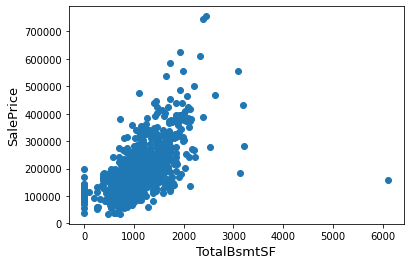

In [18]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['TotalBsmtSF'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

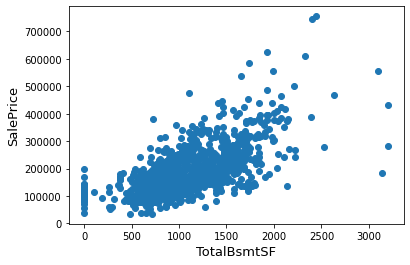

In [19]:
# delete outliers
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF']>5000) & (df_train['SalePrice']<300000)].index)

# reset index
df_train = df_train.reset_index(drop=True)

# check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['TotalBsmtSF'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

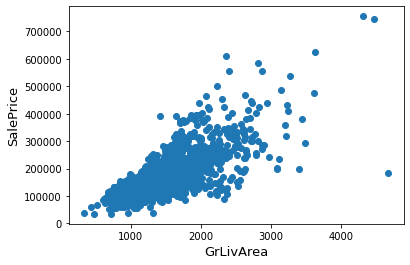

In [20]:
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

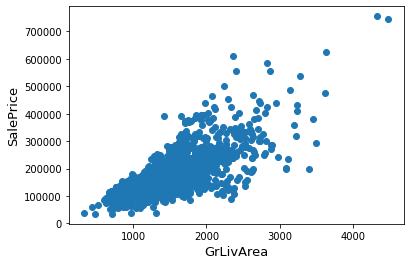

In [21]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
df_train = df_train.reset_index(drop=True)

fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

# Null Value Replacement Walkthrough

In [22]:
# missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageType,81,0.055556
GarageCond,81,0.055556
GarageFinish,81,0.055556
GarageQual,81,0.055556


In [23]:
# drop 5 columns wiht biggest ratio of null values
to_drop = missing_data.head(5).index.tolist()
df_train.drop(to_drop, axis=1, inplace=True)

In [24]:
# extract the names of columns with missing values
cols_with_missing = missing_data[missing_data.Percent > 0].index.tolist()
# remove column names that are already removed from dataset
missing_cols = list(set(cols_with_missing) - set(to_drop))
# check the datatype
df_train.dtypes[missing_cols]

GarageCond       object
MasVnrArea      float64
GarageYrBlt     float64
BsmtExposure     object
BsmtFinType1     object
BsmtQual         object
GarageType       object
GarageFinish     object
LotFrontage     float64
MasVnrType       object
Electrical       object
BsmtFinType2     object
GarageQual       object
BsmtCond         object
dtype: object

### Numeric Variables

In [25]:
num_cols_with_missing = df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'float'].index.tolist()
# create new variable with the information that it was missing
for cl in num_cols_with_missing:
    df_train[cl + "_missing_ind"] = 0
    df_train.loc[df_train[cl].isnull(), cl + "_missing_ind"] = 1

In [26]:
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].min())
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)

### Object (String) Variables

In [27]:
# 2. for categorical variables:
df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'object']
cat_cols_with_missing = df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'object'].index.tolist()

In [28]:
# GarageFinish : data description says NA means "no garage"
df_train["GarageFinish"] = df_train["GarageFinish"].fillna("None")
# GarageCond : data description says NA means "no garage"
df_train["GarageCond"] = df_train["GarageCond"].fillna("None")
# GarageQual : data description says NA means "no garage"
df_train["GarageQual"] = df_train["GarageQual"].fillna("None")
# GarageType : data description says NA means "no garage"
df_train["GarageType"] = df_train["GarageType"].fillna("None")

# BsmtExposure : data description says NA means "no basement"
df_train["BsmtExposure"] = df_train["BsmtExposure"].fillna("None")
# BsmtFinType2 : data description says NA means "no basement"
df_train["BsmtFinType2"] = df_train["BsmtFinType2"].fillna("None")
# BsmtFinType1 : data description says NA means "no basement"
df_train["BsmtFinType1"] = df_train["BsmtFinType1"].fillna("None")
# BsmtCond : data description says NA means "no basement"
df_train["BsmtCond"] = df_train["BsmtCond"].fillna("None")
# BsmtQual : data description says NA means "no basement"
df_train["BsmtQual"] = df_train["BsmtQual"].fillna("None")

In [29]:
df_train['Electrical'] = df_train['Electrical'].fillna('Empty')
df_train['MasVnrType'] = df_train['MasVnrType'].fillna('Empty')

In [30]:
# missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
LotFrontage_missing_ind,0,0.0
BsmtQual,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
...,...,...
TotRmsAbvGrd,0,0.0
Functional,0,0.0
Fireplaces,0,0.0
GarageType,0,0.0


# Value Transformation Walkthrough

In [31]:
num_feats = df_train.dtypes[df_train.dtypes != 'object'].index.tolist()

In [32]:
len(num_feats)

40

### Numberic Variables

<AxesSubplot:xlabel='1stFlrSF', ylabel='Count'>

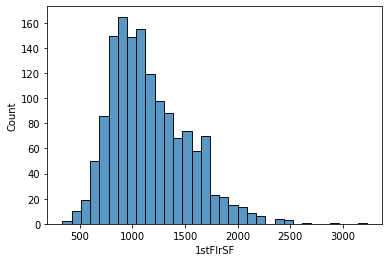

In [33]:
# transform skewed features. For example:
sns.histplot(df_train['1stFlrSF'])

<AxesSubplot:xlabel='1stFlrSF_log', ylabel='Count'>

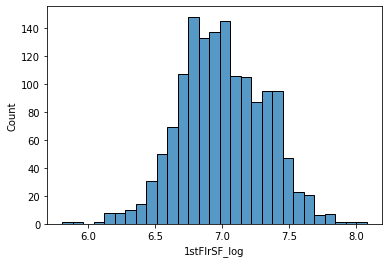

In [34]:
# log transformation
df_train['1stFlrSF_log'] = df_train['1stFlrSF'].apply(np.log)
sns.histplot(df_train['1stFlrSF_log'])

In [35]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

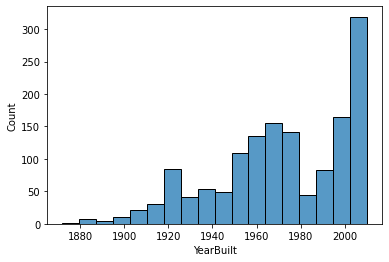

In [36]:
sns.histplot(df_train['YearBuilt'])

In [37]:
# variable that can be improved by some type of transformation
# OverallCond, OverallQual, GrLivArea, SalePrice, YearBuilt

In [38]:
# Scaling
from sklearn.preprocessing import StandardScaler
# 
scaller = StandardScaler()
df_train_scaled = pd.DataFrame(scaller.fit_transform(df_train[num_feats+["1stFlrSF_log", 'OverallCond','OverallQual','GrLivArea','YearBuilt']].astype(float)))
# Note that column names need to be added to df_train_scaled

### String Variables

In [39]:
# lets map ORDINAL features
df_train = df_train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                           "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                           "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                           "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5,
                                           "Min2" : 6, "Min1" : 7, "Typ" : 8},
                           "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                           "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                           "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                           "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                           "Street" : {"Grvl" : 1, "Pave" : 2},
                           "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                         )

In [40]:
cat_feats = df_train.dtypes[df_train.dtypes == 'object'].index.tolist()
df_dummy = pd.get_dummies(df_train[cat_feats])

In [41]:
df_dummy.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,1,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


# Feature Engineering Walkthrough

### Combination of the Existing Features

<AxesSubplot:xlabel='1stFlr_2ndFlr_SF', ylabel='SalePrice'>

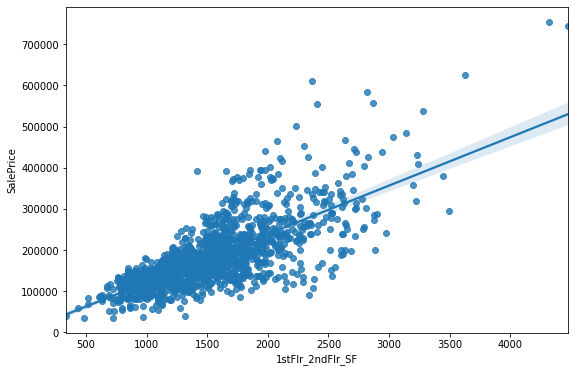

In [42]:
df_train['1stFlr_2ndFlr_SF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF']

f, ax = plt.subplots(figsize=(9,6))
# seaborn's regression plot
sns.regplot(x=(df_train['1stFlr_2ndFlr_SF']), y=df_train['SalePrice'], data=df_train, order=1)

In [43]:
# overall quality of a house
df_train['OverallGrade'] = df_train['OverallQual'] * df_train['OverallCond']

In [44]:
# total square footage
df_train['Total_SF'] = df_train['1stFlr_2ndFlr_SF'] + df_train['TotalBsmtSF'] + df_train['GrLivArea']

In [45]:
# total num of bathrooms
df_train['TotalBath'] = df_train['BsmtFullBath'] + df_train['BsmtHalfBath'] + df_train['FullBath'] + df_train['HalfBath']

In [46]:
# overall exterior quality
df_train['OverallExtGrade'] = df_train['ExterQual'] * df_train['ExterCond']

### Simplification of Existing Features

(-0.5, 5.5, 0.0, 800000.0)

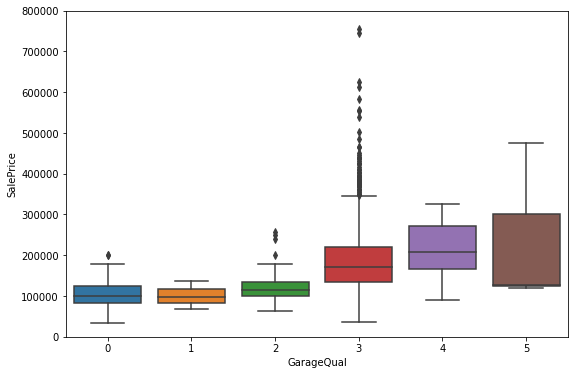

In [47]:
var = 'GarageQual'
f, ax = plt.subplots(figsize=(9,6))
data = df_train[['SalePrice', var]]
fig = sns.boxplot(x=var, y='SalePrice', data = data)
fig.axis(ymin=0, ymax=800000)

In [48]:
# merge first three categories into 1
df_train["SimplGarageQual"] = df_train.GarageQual.replace({1 : 0, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })

(-0.5, 2.5, 0.0, 800000.0)

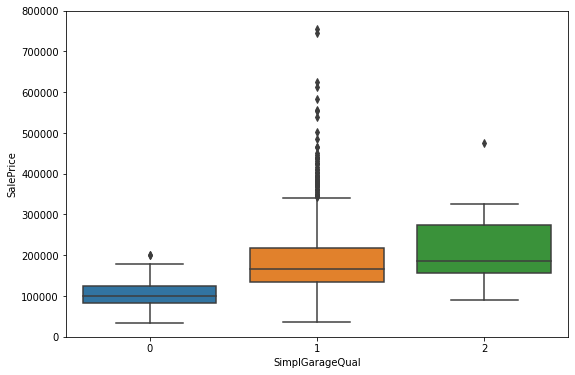

In [49]:
var = 'SimplGarageQual'
f, ax = plt.subplots(figsize=(9, 6))
data = df_train[['SalePrice',var]]
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

(-0.5, 6.5, 0.0, 800000.0)

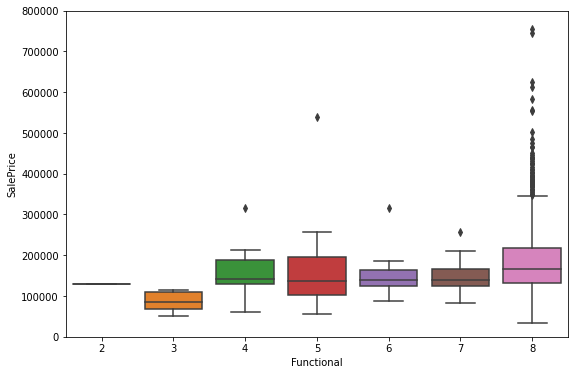

In [50]:
var = "Functional"
f, ax = plt.subplots(figsize=(9, 6))
data = df_train[['SalePrice',var]]
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

In [51]:
df_train["SimpleFunctional"] = df_train.Functional.replace({1 : 0, 2: 0, 3: 0, # bad
                                                     4 : 1, 5 : 1, 6 : 1, # okay
                                                     7 : 2, 8 : 2 # good
                                                    })

(-0.5, 2.5, 0.0, 800000.0)

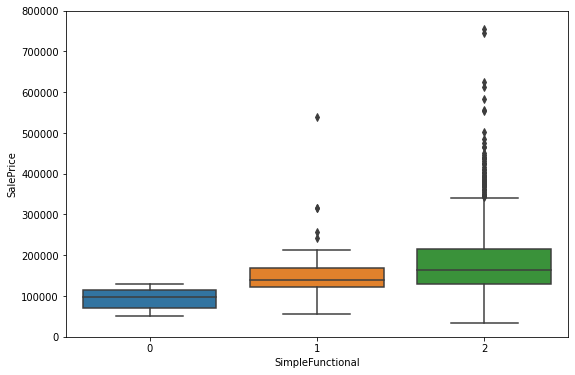

In [52]:
var = "SimpleFunctional"
f, ax = plt.subplots(figsize=(9, 6))
data = df_train[['SalePrice',var]]
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

In [53]:
final_num_feats = df_train.dtypes[df_train.dtypes != 'object'].index.tolist()
df_numeric = df_train[final_num_feats]

# Variable Selection Walkthrough

In [54]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_regression, SelectKBest

In [55]:
y = df_numeric.SalePrice
df_numeric.drop("SalePrice",axis=1, inplace=True)

/Users/reneehall/opt/anaconda3/envs/lighthouse/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Part 1: Removing Features with small variance

In [56]:
vt = VarianceThreshold(0.1)
df_transformed = vt.fit_transform(df_numeric)

In [57]:
print(df_numeric.shape)
print(df_transformed.shape)

(1458, 63)
(1458, 53)


In [58]:
# columns we have selected
# get_support() is method of VarianceThreshold and stores 
# boolean of each variable in the numpy array.
selected_columns = df_numeric.columns[vt.get_support()]
# transforming an array back to a data-frame preserves column labels
df_transformed = pd.DataFrame(df_transformed, columns = selected_columns)

### Part 2: Removing Correlated Features

In [59]:
# step 1
df_corr = df_transformed.corr().abs()

# step 2
indices = np.where(df_corr > 0.8) 
indices = [(df_corr.index[x], df_corr.columns[y]) for x, y in zip(*indices)
                                    if x != y and x < y]

# step 3
for idx in indices: #each pair
    try:
        df_transformed.drop(idx[1], axis = 1, inplace=True)
    except KeyError:
        pass

In [60]:
print(indices)

[('ExterQual', 'OverallExtGrade'), ('TotalBsmtSF', '1stFlrSF'), ('GrLivArea', 'TotRmsAbvGrd'), ('GrLivArea', '1stFlr_2ndFlr_SF'), ('GrLivArea', 'Total_SF'), ('TotRmsAbvGrd', '1stFlr_2ndFlr_SF'), ('GarageCars', 'GarageArea'), ('GarageQual', 'GarageCond'), ('1stFlr_2ndFlr_SF', 'Total_SF')]


In [61]:
df_transformed.shape

(1458, 46)

### Part 3: Forward Regression

In [62]:
skb = SelectKBest(f_regression, k=10)
X = skb.fit_transform(df_transformed, y)

In [63]:
# this will give us the position of top 10 columns --> skb.get_support()
# column names --> df_transformed.columns[skb.get_support()]
X = pd.DataFrame(X, columns = df_transformed.columns[skb.get_support()])

In [64]:
X

,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,GarageCars,OverallGrade,TotalBath
0,7.0,4.0,4.0,856.0,1710.0,2.0,4.0,2.0,35.0,4.0
1,6.0,3.0,4.0,1262.0,1262.0,2.0,3.0,2.0,48.0,3.0
2,7.0,4.0,4.0,920.0,1786.0,2.0,4.0,2.0,35.0,4.0
3,7.0,3.0,3.0,756.0,1717.0,1.0,4.0,3.0,35.0,2.0
4,8.0,4.0,4.0,1145.0,2198.0,2.0,4.0,3.0,40.0,4.0
...,...,...,...,...,...,...,...,...,...,...
1453,6.0,3.0,4.0,953.0,1647.0,2.0,3.0,2.0,30.0,3.0
1454,6.0,3.0,4.0,1542.0,2073.0,2.0,3.0,2.0,36.0,3.0
1455,7.0,5.0,3.0,1152.0,2340.0,2.0,4.0,1.0,63.0,2.0
1456,5.0,3.0,3.0,1078.0,1078.0,1.0,4.0,1.0,30.0,2.0


In [65]:
X.to_csv('selected_variables_houseing.csv')

In [68]:
X.head()

,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,GarageCars,OverallGrade,TotalBath
0,7.0,4.0,4.0,856.0,1710.0,2.0,4.0,2.0,35.0,4.0
1,6.0,3.0,4.0,1262.0,1262.0,2.0,3.0,2.0,48.0,3.0
2,7.0,4.0,4.0,920.0,1786.0,2.0,4.0,2.0,35.0,4.0
3,7.0,3.0,3.0,756.0,1717.0,1.0,4.0,3.0,35.0,2.0
4,8.0,4.0,4.0,1145.0,2198.0,2.0,4.0,3.0,40.0,4.0


In [74]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [75]:
full_df = X

In [76]:
full_df['Sale_Price'] = y

In [77]:
full_df.head()

,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,GarageCars,OverallGrade,TotalBath,Sale_Price
0,7.0,4.0,4.0,856.0,1710.0,2.0,4.0,2.0,35.0,4.0,208500
1,6.0,3.0,4.0,1262.0,1262.0,2.0,3.0,2.0,48.0,3.0,181500
2,7.0,4.0,4.0,920.0,1786.0,2.0,4.0,2.0,35.0,4.0,223500
3,7.0,3.0,3.0,756.0,1717.0,1.0,4.0,3.0,35.0,2.0,140000
4,8.0,4.0,4.0,1145.0,2198.0,2.0,4.0,3.0,40.0,4.0,250000


In [78]:
full_df.to_csv('target_and_selected_variables_houseing.csv')